# INDEX

---
**for-loop + if-else: conditional operators**
- if-else Application: Traversing AQX
    - Rescaling to categories
    - Detecting prominants
        - Top value
        - Top site
        - Top 3 sites


# if-for applications

Reference https://jirlong.gitbook.io/pytutorial/python-basic/4.-if-else-for

* **Counting**: 把所有文字看過一遍，計算文字的出現次數
* **Filtering**: 列印出你所要呈現的youbike站台：指定要某幾個、透過if來判斷，指定要滿載的
* **Finding Max/Min**: 透過比較來找到最大值和最小值
* **Conditional Replacing**: 處理缺漏值，AQX不定期地會有缺漏值，要用`if`來偵測是否有缺漏值，並指定遇到缺漏值要怎麼做處理。或者是查驗輸入的日期是否合理
* **Sorting**: 用`for`遍歷PM2.5的值來對PM2.5做排序，找到最大或者是前三大的PM2.5站台
* **Rescaling**: 分組。若告訴一個使用者PM2.5是67，他可能不知道這個數字代表什麼意義，但你若透過一個標準的Mapping把它mapping到非常高、高、中、低、非常低等五個等級，並告訴使用者說現在這個區域PM2.5是高，那他就聽得懂。

# The AQX case

**範例說明**：從資料來源為行政院環保署的空氣品質監測網（[PM2.5 introduced by 行政院環保署](https://taqm.epa.gov.tw/taqm/tw/default.aspx)）可以看到即時的空氣品質，包含指標和嚴重程度（上顏色）。上顏色的方法是依照AQI的值分成六個等級。當要把AQI值繪製為相對應的等級時，必須要判斷AQI值落在哪一個區間，此時，需要用if-else的條件判斷式來判斷，究竟是落在哪個區間。而測站不會只有一個，因此，要一個接一個判斷完現在所有的測站落在哪一個區間的話，那就要用for-loop來判斷完所有的測站。

**資料來源**：行政院環保署有一個自己的開放資料網站https://opendata.epa.gov.tw ，即時更新的速度會比政府開放資料平台快。https://opendata.epa.gov.tw/api/v1/AQI?%24skip=0&%24top=1000&%24format=json

**分析策略**：看到空氣品質的資料，或類似的資料（例如水污染、噪音、紫外線）一般會想要做什麼事？
1. 找到突出的（Prominent）資料：找到最嚴重的地區。如果最嚴重的地區不只一個，那就要列印出多個地區。要做這件事就要找到最大值或者是最小值。在程式的邏輯上就是把所有資料看過一遍，透過大小比較，找出最大的那個值。

2. 找到突出的（Prominent）資料：不僅找到最嚴重的地區，還要找到前三大、前五大、前10％。在程式的邏輯上，就要做排序。以由大到小來排序的狀況來說，要用前面的方法，找到最大值，再從剩下的找出次大值、再從剩下的找出次大值，依此類推。

3. 獲取資料摘要。例如平均值、四分位數、左/右傾分佈（常態分配、Power low）。

4. 描述資料分佈。雖然知道平均值或四分位數等已經能夠知道部分資料的概況，但通常會需要知道資料分布的概況，例如空氣品質差的地方多，還是好的地方多？或者是空氣品質在每個不同的等級的，各有幾個測站？這程式的基本邏輯通常是分堆或分類後進行計數（Counting），或者是單就數值直接進行Counting。

5. 篩選出目標觀察資料：例如，比較大都市內或非大都市的測站，看看PM2.5或者O3比較嚴重。

為什麼要找到這些資料的概況？簡單地說，是為了讓一般人聽得懂，但要求有憑有據。只有資料的分析者和操作者看得到資料，但重點是你今天通常為什麼要做資料分析，是因為你想要傳達給別人，這筆資料有啥特殊之處，或者他平淡無奇。但為了做到這點，你需要用一個他們都聽得懂的語彙，例如「大部分的區域」、「最嚴重的區域」、「前幾大」。然而，這些語彙的邏輯實際上都模糊而不準確，但若你有資料和數學的支持，你就可以說得有信心，有憑有據，而不至於信口開河。

## Loading AQX data

In [61]:
import requests
import json
url = "https://opendata.epa.gov.tw/api/v1/AQI?%24skip=0&%24top=1000&%24format=json"
response = requests.get(url)
aqdata = json.loads(response.text)
print(type(aqdata))

<class 'list'>


In [37]:
print(aqdata[0])
print(type(aqdata[0]))

{'SiteName': '屏東(枋寮)', 'County': '屏東縣', 'AQI': '41', 'Pollutant': '', 'Status': '良好', 'SO2': '0.2', 'CO': '0.21', 'CO_8hr': '0.2', 'O3': '16.2', 'O3_8hr': '32', 'PM10': '24', 'PM2.5': '16', 'NO2': '9.4', 'NOx': '9.7', 'NO': '0.2', 'WindSpeed': '1', 'WindDirec': '59', 'PublishTime': '2021/10/22 00:00:00', 'PM2.5_AVG': '12', 'PM10_AVG': '29', 'SO2_AVG': '0', 'Longitude': '120.59036944', 'Latitude': '22.38474167', 'SiteId': '313'}
<class 'dict'>


## (Practice) Traversing AQI content

*(同Youbike的範例）*<br>
**法則一：如果偵測出他是一個list**，那就取出第0筆資料往下追蹤。

**法則二：如果偵測出他是一個dict**，就用`dict.keys()`將其所有的key給列印出來，然後挑你所需要的key往下追蹤。但如果`.keys()`印出來的結果是類似流水號的id（e.g., youbike data），那就代表設計者把id對應到該id的資料。此時，也是不失一般性，取第一個id作為索引來往下存取即可。

In [38]:
print(type(aqdata))
print("Length of:", len(aqdata))
print("The first item of:", aqdata[0])
print(type(aqdata[0])) # aqdata is a list of dicts, easy to convert into pandas df
print(aqdata[0].keys())

<class 'list'>
Length of: 84
The first item of: {'SiteName': '屏東(枋寮)', 'County': '屏東縣', 'AQI': '41', 'Pollutant': '', 'Status': '良好', 'SO2': '0.2', 'CO': '0.21', 'CO_8hr': '0.2', 'O3': '16.2', 'O3_8hr': '32', 'PM10': '24', 'PM2.5': '16', 'NO2': '9.4', 'NOx': '9.7', 'NO': '0.2', 'WindSpeed': '1', 'WindDirec': '59', 'PublishTime': '2021/10/22 00:00:00', 'PM2.5_AVG': '12', 'PM10_AVG': '29', 'SO2_AVG': '0', 'Longitude': '120.59036944', 'Latitude': '22.38474167', 'SiteId': '313'}
<class 'dict'>
dict_keys(['SiteName', 'County', 'AQI', 'Pollutant', 'Status', 'SO2', 'CO', 'CO_8hr', 'O3', 'O3_8hr', 'PM10', 'PM2.5', 'NO2', 'NOx', 'NO', 'WindSpeed', 'WindDirec', 'PublishTime', 'PM2.5_AVG', 'PM10_AVG', 'SO2_AVG', 'Longitude', 'Latitude', 'SiteId'])


## (Practice) Print out data by for-loop

print formation rules https://docs.python.org/3/tutorial/inputoutput.html
```
龍潭 68 10
新竹 80 
湖口 72 21
竹東 66 11
頭份 95 
苗栗 78 24
三義 72 32
豐原 71 24
沙鹿 89 33
```

In [62]:
# Your code should be here

for site in aqdata:
#    print(site['SiteName'], site['AQI'], site['PM2.5']) or
    print("%s\t%s\t%s"%(site['SiteName'], site['AQI'], site['PM2.5']))

屏東(枋寮)	80	48
臺南(學甲)	44	10
新北(樹林)	38	3
屏東(琉球)	79	26
臺南(麻豆)	27	9
高雄(湖內)	39	11
大城	32	7
富貴角	50	5
麥寮	39	9
關山	33	0
馬公	36	5
金門	23	3
馬祖	37	19
埔里	32	10
復興	57	20
永和	25	5
竹山	33	11
中壢	43	7
三重	57	11
冬山	26	2
宜蘭	28	2
陽明	44	3
花蓮	32	4
臺東	31	
恆春	39	4
潮州	62	33
屏東	45	15
小港	61	22
前鎮	54	20
前金	61	23
左營	63	23
楠梓	52	18
林園	69	24
大寮	66	33
鳳山	66	24
仁武	60	21
橋頭	56	19
美濃	33	12
臺南	31	14
安南	28	12
善化	30	13
新營	26	8
嘉義	29	11
臺西	33	9
朴子	41	6
新港	23	5
崙背	52	12
斗六	21	6
南投	25	
二林	28	6
線西	26	5
彰化	25	4
西屯	25	6
忠明	23	4
大里	18	3
沙鹿	28	4
豐原	23	2
三義	26	3
苗栗	22	3
頭份	27	2
新竹	28	3
竹東	28	4
湖口	35	8
龍潭	25	2
平鎮	30	6
觀音	35	11
大園	38	6
桃園	28	3
大同	58	15
松山	27	4
古亭	25	5
萬華	18	5
中山	40	3
士林	22	4
淡水	37	2
林口	31	2
菜寮	38	7
新莊	32	4
板橋	30	5
土城	25	0
新店	25	4
萬里	46	6
汐止	28	10
基隆	41	5


## (Practice) Updating missing PM2.5 value

在這個例子中，由於我發現PM2.5偶而會有空值（就該場站的資料沒有傳回來），我可以用`for`-each掃過所有的資料，然後用`if`來判斷，如果資料是空值的話（如下面的空字串`""`或者被標示為`ND`），就把`-1`assign給他，不然的話就保留原本的數值，或是像下面一樣，用`int()`把它轉為整數。我在`for`-each掃過所有資料時，我用了一個變數`site`，他的效果相當於把`list aqdata`裡面的每一個element走訪一遍，當`site`內容被改變時，`aqdata`的內容也會一併被改變。

In [63]:
for site in aqdata:
    # Your code should be here
    if site["PM2.5"] == "" or site["PM2.5"] == "ND":
        site["PM2.5"] = -1
    else:
        site["PM2.5"] = int(site["PM2.5"])  # 置換 aqdata的內容

# print out the first 10 records for glimpse
for aq in aqdata:
    print(aq["SiteName"], aq["AQI"], aq["PM2.5"]) # 即使 for loop iteration的變數換為 aq，也只是 print已被變數 site 置換後的 aqdata


屏東(枋寮) 80 48
臺南(學甲) 44 10
新北(樹林) 38 3
屏東(琉球) 79 26
臺南(麻豆) 27 9
高雄(湖內) 39 11
大城 32 7
富貴角 50 5
麥寮 39 9
關山 33 0
馬公 36 5
金門 23 3
馬祖 37 19
埔里 32 10
復興 57 20
永和 25 5
竹山 33 11
中壢 43 7
三重 57 11
冬山 26 2
宜蘭 28 2
陽明 44 3
花蓮 32 4
臺東 31 -1
恆春 39 4
潮州 62 33
屏東 45 15
小港 61 22
前鎮 54 20
前金 61 23
左營 63 23
楠梓 52 18
林園 69 24
大寮 66 33
鳳山 66 24
仁武 60 21
橋頭 56 19
美濃 33 12
臺南 31 14
安南 28 12
善化 30 13
新營 26 8
嘉義 29 11
臺西 33 9
朴子 41 6
新港 23 5
崙背 52 12
斗六 21 6
南投 25 -1
二林 28 6
線西 26 5
彰化 25 4
西屯 25 6
忠明 23 4
大里 18 3
沙鹿 28 4
豐原 23 2
三義 26 3
苗栗 22 3
頭份 27 2
新竹 28 3
竹東 28 4
湖口 35 8
龍潭 25 2
平鎮 30 6
觀音 35 11
大園 38 6
桃園 28 3
大同 58 15
松山 27 4
古亭 25 5
萬華 18 5
中山 40 3
士林 22 4
淡水 37 2
林口 31 2
菜寮 38 7
新莊 32 4
板橋 30 5
土城 25 0
新店 25 4
萬里 46 6
汐止 28 10
基隆 41 5


## (Practice) Using `i` as index to update data (Another way)

我也可以透過index去access`aqdata`中第0個、第1個、第2個dict的內容。但此時你就要去用index存取`aqdata["Data"]`內的值，你的程式碼會稍微長一點點。

In [64]:
for i in range(len(aqdata)):
    # Your code should be here
    if aqdata[i]["PM2.5"] == "" or aqdata[i]["PM2.5"] == "ND":
        aqdata[i]["PM2.5"] = -1
    else:
        aqdata[i]["PM2.5"] = int(aqdata[i]["PM2.5"])



# print out updated aqdata
for site in aqdata: 
    print(site["SiteName"], site["AQI"], site["PM2.5"])

屏東(枋寮) 80 48
臺南(學甲) 44 10
新北(樹林) 38 3
屏東(琉球) 79 26
臺南(麻豆) 27 9
高雄(湖內) 39 11
大城 32 7
富貴角 50 5
麥寮 39 9
關山 33 0
馬公 36 5
金門 23 3
馬祖 37 19
埔里 32 10
復興 57 20
永和 25 5
竹山 33 11
中壢 43 7
三重 57 11
冬山 26 2
宜蘭 28 2
陽明 44 3
花蓮 32 4
臺東 31 -1
恆春 39 4
潮州 62 33
屏東 45 15
小港 61 22
前鎮 54 20
前金 61 23
左營 63 23
楠梓 52 18
林園 69 24
大寮 66 33
鳳山 66 24
仁武 60 21
橋頭 56 19
美濃 33 12
臺南 31 14
安南 28 12
善化 30 13
新營 26 8
嘉義 29 11
臺西 33 9
朴子 41 6
新港 23 5
崙背 52 12
斗六 21 6
南投 25 -1
二林 28 6
線西 26 5
彰化 25 4
西屯 25 6
忠明 23 4
大里 18 3
沙鹿 28 4
豐原 23 2
三義 26 3
苗栗 22 3
頭份 27 2
新竹 28 3
竹東 28 4
湖口 35 8
龍潭 25 2
平鎮 30 6
觀音 35 11
大園 38 6
桃園 28 3
大同 58 15
松山 27 4
古亭 25 5
萬華 18 5
中山 40 3
士林 22 4
淡水 37 2
林口 31 2
菜寮 38 7
新莊 32 4
板橋 30 5
土城 25 0
新店 25 4
萬里 46 6
汐止 28 10
基隆 41 5


## (Practice) Using `enumerate()` to access index and data

前面我們介紹到兩個版本，
1. `for site in aqdata:`是用`site`作為臨時變數以在for-loop中存取所有的資料項目；
2. `for i in range(len(aqdata)):`的做法則是用`i`作為index來存取原本的`aqdata`。
3. 以上兩種方法是取用並置換`aqdata`內的數值，所以任何更改都會更動到原本`aqdata`的內容，需要執行原本的`aqdata`的話就要重新讀code。

但其實還有第三種選擇就是用`enumerate()`來同時存取index和資料項目，當我需要access這是第幾個項目，或者需要access原本的項目值時，那我就用index，但我如果只是要判斷一下大小，那我就可以用被取出來的資料項目。寫法如下：

`for i, site in enumerate(aqdata):`

In [65]:
print(type(enumerate(aqdata)))

for i, site in enumerate(aqdata):
    # Your code should be here
    if site["PM2.5"] == "" or site["PM2.5"] == "ND":
        site["PM2.5"] = -1
    else:
        site["PM2.5"] = int(site["PM2.5"])

# print out the first 10 records for glimpse
for i, site in enumerate(aqdata[:10]):
    print(i, site["SiteName"], site["AQI"], site["PM2.5"])

<class 'enumerate'>
0 屏東(枋寮) 80 48
1 臺南(學甲) 44 10
2 新北(樹林) 38 3
3 屏東(琉球) 79 26
4 臺南(麻豆) 27 9
5 高雄(湖內) 39 11
6 大城 32 7
7 富貴角 50 5
8 麥寮 39 9
9 關山 33 0


# Converting AQI data format

顯然AQI資料是一個非常標準的JSON格式，轉換為Python的資料型態就會變成List of dictionary。<br>
但這樣我無法直接用站台名稱來存取該站台的資料，也就是不能用`aqdict["三重"]`就直接列印出`三重`的所有資料。<br>

但我可以重建一個新的以測站作為key的dictionary。此時，我只需要把整個list of dict走訪過一遍，把list中每個dict assign給該dict中的測站名稱 `site["SiteName"]`


In [19]:
aqdict = {}  # Initialize a new dictionary

for site in aqdata:
    # Your code should be here

In [20]:
aqdict["三重"]

{'SiteName': '三重',
 'County': '新北市',
 'AQI': '51',
 'Pollutant': '二氧化氮',
 'Status': '普通',
 'SO2': '2.3',
 'CO': '1.15',
 'CO_8hr': '0.8',
 'O3': '20.7',
 'O3_8hr': '28',
 'PM10': '24',
 'PM2.5': 13,
 'NO2': '31.9',
 'NOx': '62.4',
 'NO': '30.5',
 'WindSpeed': '-',
 'WindDirec': '-',
 'PublishTime': '2021/10/02 17:00:00',
 'PM2.5_AVG': '12',
 'PM10_AVG': '25',
 'SO2_AVG': '1',
 'Longitude': '121.493806',
 'Latitude': '25.072611',
 'SiteId': '67'}

## Dump new dict to .json

在Python中把資料dump成json會遠比csv來得方便，在R中則剛好相反。原因是Python的dictionary與list兩項資料結構恰好json的格式一一相符，所以非常容易就可以把資料dump出去或者read進來。如果是要dump成csv檔的話，就必須想辦法把資料整理成pandas dataframe的二維型態。


In [21]:
json.dump(aqdict, open('aqi.json', 'w'))

# Rescale AQI index

前面說到一般民眾其實不太了解AQI數值的意義，也不知道最大最小值是多少，所以跟民眾講AQI的數值是沒意義的。民眾比較容易了解的是「現在嚴不嚴重」。因此，我們可以依照環保署對於空氣品質的等級劃分方法來將所有站台區分成幾個等級。程式邏輯上要做的事情是，用if-elif-else來設計好不同的區間判斷，然後用for-loop把所有AQI的值走訪過一遍，看每個站台落入哪個區間。
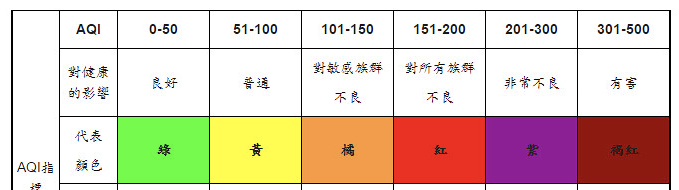

In [66]:
for i, site in enumerate(aqdata):
    if site["AQI"] == "":
        aqdata[i]["Quality"] = "Unknown"
    elif int(site["AQI"]) >= 0 and int(site["AQI"]) < 51:
        aqdata[i]["Quality"] = "Good"
    
    ## add more role here
    elif int(site["AQI"]) >= 51 and int(site["AQI"]) < 101:
        aqdata[i]["Quality"] = "Moderate"
    elif int(site["AQI"]) >= 101 and int(site["AQI"]) < 151:
        aqdata[i]["Quality"] = "Unhealthy for Sensitive Groups"
    elif int(site["AQI"]) >= 151 and int(site["AQI"]) < 201:
        aqdata[i]["Quality"] = "Unhealthy"
    elif int(site["AQI"]) >= 201 and int(site["AQI"]) < 301:
        aqdata[i]["Quality"] = "Very Unhealthy"
    elif int(site["AQI"]) >= 301 and int(site["AQI"]) <= 500:
        aqdata[i]["Quality"] = "Hazardous"

for site in aqdata[:10]:
    print(site["SiteName"], "\t", site["Quality"], site["AQI"])

屏東(枋寮) 	 Moderate 80
臺南(學甲) 	 Good 44
新北(樹林) 	 Good 38
屏東(琉球) 	 Moderate 79
臺南(麻豆) 	 Good 27
高雄(湖內) 	 Good 39
大城 	 Good 32
富貴角 	 Good 50
麥寮 	 Good 39
關山 	 Good 33


## AQI by epa's standard

| Label | Range   |
|------|------|
|Good|0~50|
|Moderate|51~100|
|Unhealthy for Sensitive Groups|101~150|
|Unhealthy|151~200|
|Very Unhealthy|201~300|
|Hazardous|301~500|

## (Option) Rescale better

為了避免過多的if-elif-else或者switch的使用，可以先把scale和category寫成兩個List，然後用多一層for-loop來trace該value會落在List的哪個區間。

In [72]:
degree = ['Unknown', 'Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous']
scaler = [0, 50, 100, 150, 200, 300, 501]
# How about using dict for rescaling? How to change the code below?

for site in aqdata:
    if site['AQI'] != "":
        for i, n in enumerate(scaler):
            if int(site['AQI']) < n:
                d = i
                break
        site['Quality'] = degree[d]

for site in aqdata[:10]:
    print(site['SiteName'], int(site['AQI']), site['Quality'])

屏東(枋寮) 80 Moderate
臺南(學甲) 44 Good
新北(樹林) 38 Good
屏東(琉球) 79 Moderate
臺南(麻豆) 27 Good
高雄(湖內) 39 Good
大城 32 Good
富貴角 50 Moderate
麥寮 39 Good
關山 33 Good


# Detect prominant data

通常我們有了這類的資料後，第一個想到的分析方法就是找到最嚴重、最差、變化最劇烈的地區。以下這是個非常好的例子說明要如何運用`if`和`for`找出PM2.5最高的地區。在過程中，必須要注意，原本的資料的資料型態為何，甚至要注意，原本的資料是否有缺漏。在這個案例中，我希望找出，現在PM2.5最高的是哪些站台，且把該站台列印出來。注意，我要列印的是，PM2.5最高的站台，而不是最高的PM2.5值；此外還要注意，PM2.5最高的站台可能不只一個（這時候該怎麼處理？）。


## (Practice) Find the maximum

找到最大值或最小值的概念：就個人的邏輯思考一下，我要怎麼找到一群數的最大值？解題邏輯：把第一個數先拿來當標準，之後確認過每個數，有沒有比這個數更大的，若有的話，最大值就是找到的那個數，沒有的話，那第一個數就是最大值。

In [29]:
# finding the maximum value
alist = [5, 3, 2, 4, 1, 3, 2, 4, 7, 82, 19, 23, 42]

mina, maxa = 10000, 0
min_site, max_site = "", ""
for site in aqdata:
    if int(site['AQI'])> maxa:
        maxa = int(site['AQI'])
        max_site = site['SiteName']
    if int(site['AQI'])< mina:
        mina = int(site['AQI'])    
        min_site = site['SiteName']   

# mina, maxa = 100, 0

#     print maxa, a
print(min_site, mina)
print(max_site, maxa)

關山 35
竹山 132


## Use built-in functions

這類比較大小的簡單功能一定都有人幫忙寫好了（如以下的例子），只要記得使用它就好。但是，要記得這樣的函式其實就是透過類似上述方法來比較大小以找到最大值。

In [30]:
print(min(alist), max(alist), sum(alist), len(alist), float(sum(alist))/len(alist))

1 82 197 13 15.153846153846153


## (Practice) Find the sites with the maximum PM2.5 value

接下來我們將以上述的演算邏輯來找到PM2.5最高的那個site。我們先用上述的核心邏輯來找到最大值（下方的`max_value`）為何，然後再用一個`for`-loop把所有站台看一遍，看看哪些站台的PM2.5值等於`max_value`。

In [71]:
print(aqdata[0].keys())

# Initialize a very small maximum value
max_value = 0

# Compare to see if any one larger than the maximum value
for site in aqdata:
    if int(site['AQI']) > max_value:
        max_value = int(site['AQI'])
print("The maximum AQI value: ", max_value)

# Traverse all sites by for loop to see whose value equals to the maximum PM2.5 value
for site in aqdata:
    if int(site['AQI']) == max_value:
        print(site['SiteName'], site['AQI'], site['PM2.5'], site['Quality'], max_value)

dict_keys(['SiteName', 'County', 'AQI', 'Pollutant', 'Status', 'SO2', 'CO', 'CO_8hr', 'O3', 'O3_8hr', 'PM10', 'PM2.5', 'NO2', 'NOx', 'NO', 'WindSpeed', 'WindDirec', 'PublishTime', 'PM2.5_AVG', 'PM10_AVG', 'SO2_AVG', 'Longitude', 'Latitude', 'SiteId', 'Quality'])
The maximum AQI value:  80
屏東(枋寮) 80 48 Good 80


# Find top n

## (Practice) Sorted by `sorted` function

下列的程式碼想法如下：
1. 我先把所有的PM2.5的值給存起來，
2. 存起來以後，我用`sorted()`這個函式把這些值做排序。
3. 排序後的List我就很方便取一個閾值（最大值、前四分之一大的值或者是前三大的值）。
4. 然後我把大於該閾值的站台都給列印出來，即為所求。

In [83]:
## Use a list to store all AQI value
aqi_list = []
for site in aqdata:
    # Your code should be here
    # 把東西加到 list 裡面，很重要一點如果加到 list 的是 site['AQI']，那 sorted()沒有用，因為 site['AQI'] 是 str
    aqi_list.append(int(site['AQI']))
print(aqi_list)
        
## sort the list by sorted()
aqi_list = sorted(aqi_list, reverse = True) # from head to toe
print(aqi_list)

threshold = aqi_list[2] # top 3
for site in aqdata:
    if int(site['AQI']) >= threshold:
        print(site['SiteName'], site['AQI'], site['PM2.5'], site['Quality'])

[80, 44, 38, 79, 27, 39, 32, 50, 39, 33, 36, 23, 37, 32, 57, 25, 33, 43, 57, 26, 28, 44, 32, 31, 39, 62, 45, 61, 54, 61, 63, 52, 69, 66, 66, 60, 56, 33, 31, 28, 30, 26, 29, 33, 41, 23, 52, 21, 25, 28, 26, 25, 25, 23, 18, 28, 23, 26, 22, 27, 28, 28, 35, 25, 30, 35, 38, 28, 58, 27, 25, 18, 40, 22, 37, 31, 38, 32, 30, 25, 25, 46, 28, 41]
[80, 79, 69, 66, 66, 63, 62, 61, 61, 60, 58, 57, 57, 56, 54, 52, 52, 50, 46, 45, 44, 44, 43, 41, 41, 40, 39, 39, 39, 38, 38, 38, 37, 37, 36, 35, 35, 33, 33, 33, 33, 32, 32, 32, 32, 31, 31, 31, 30, 30, 30, 29, 28, 28, 28, 28, 28, 28, 28, 28, 27, 27, 27, 26, 26, 26, 26, 25, 25, 25, 25, 25, 25, 25, 25, 23, 23, 23, 23, 22, 22, 21, 18, 18]
屏東(枋寮) 80 48 Moderate
屏東(琉球) 79 26 Moderate
林園 69 24 Moderate


## Print out the site which values are larger than the first quarter

In [85]:
print(aqi_list[int(len(aqi_list)/4)])

for site in aqdata:
    if int(site['AQI']) >= aqi_list[int(len(aqi_list)/4)]:
        print(site['SiteName'], site['AQI'], site['Quality'])

44
屏東(枋寮) 80 Moderate
臺南(學甲) 44 Good
屏東(琉球) 79 Moderate
富貴角 50 Moderate
復興 57 Moderate
三重 57 Moderate
陽明 44 Good
潮州 62 Moderate
屏東 45 Good
小港 61 Moderate
前鎮 54 Moderate
前金 61 Moderate
左營 63 Moderate
楠梓 52 Moderate
林園 69 Moderate
大寮 66 Moderate
鳳山 66 Moderate
仁武 60 Moderate
橋頭 56 Moderate
崙背 52 Moderate
大同 58 Moderate
萬里 46 Good


## (Practice) Print out sites with top 3 serious values

In [40]:
# Your code should be here




28
復興 30
鳳山 36
橋頭 31


## DEMO-Implement `sorted` function by sorting algorithm

在前面的例子我用了一個`sorted`函式就排序了所有的PM2.5的值，那這類`sorted`函式是怎麼寫的呢？我們可以用兩層的排序演算法來達成此事。觀念很簡單：
1. 我先抓住第一個，一一和後面比較，看看有沒有人比他大，有的話，就和後面做置換（Swap），沒有的話就不動，這樣跑過一輪，就可以保證第一個最大。
2. 接下來抓住第二個，一一和後面比較，看看有沒有人比他大，，有的話，就和後面做置換（Swap），沒有的話就不動，這樣跑過一輪，就可以保證第二個是次大的。
3. 依此類推。

Reference
1. https://www.geeksforgeeks.org/bubble-sort/
2. https://en.wikipedia.org/wiki/Bubble_sort


In [87]:
alist = [3, 6, 2, 1, 7] #sorted reverse = True 就是跟下一個index比，後比前大就互換
# 3, 6, 2, 1, 7 i = 0, j = 1
# 6, 3, 2, 1, 7 i = 0, j = 2
# 6, 3, 2, 1, 7 i = 0, j = 3
# 7, 3, 2, 1, 6 i = 0, j = 4
# 7, 3, 2, 1, 6 i = 1, j = 2
# 7, 3, 2, 1, 6 i = 1, j = 3
# 7, 6, 2, 1, 3 i = 1, j = 4
# 7, 6, 2, 1, 3 i = 2, j = 3
# 7, 6, 3, 1, 2 i = 2, j = 4
# 7, 6, 3, 2, 1 i = 3, j = 4

for i in range(len(alist) - 1):
    for j in range(i+1, len(alist)):
        if alist[i] < alist[j]:
            alist[i], alist[j] = alist[j], alist[i]
print(alist)

[7, 6, 3, 2, 1]


In [99]:
pm_list = []
site_list = []
site_dict = {}
for site in aqdata:
    if site['PM2.5'] != "" or site['PM2.5'] != "ND":
        pm_list.append(int(site['PM2.5']))
        site_list.append(site['SiteName'])
    site_dict[site['SiteName']] = site # key is site['SiteName'], value is site
    
for i in range(len(pm_list)):
    for j in range(i+1, len(pm_list)):
        if pm_list[i] < pm_list[j]:
            pm_list[i], pm_list[j] = pm_list[j], pm_list[i]
            site_list[i], site_list[j] = site_list[j], site_list[i]
print(pm_list)

for i in range(int(len(pm_list)/4)):
    print(site_list[i], pm_list[i], site_dict[site_list[i]]['AQI'], site_dict[site_list[i]]['Quality'])
    #site_list[i] is site['SiteName']

[48, 33, 33, 26, 24, 24, 23, 23, 22, 21, 20, 20, 19, 19, 18, 15, 15, 14, 13, 12, 12, 12, 11, 11, 11, 11, 11, 10, 10, 10, 9, 9, 9, 8, 8, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 0, 0, -1, -1]
屏東(枋寮) 48 80 Moderate
潮州 33 62 Moderate
大寮 33 66 Moderate
屏東(琉球) 26 79 Moderate
林園 24 69 Moderate
鳳山 24 66 Moderate
左營 23 63 Moderate
前金 23 61 Moderate
小港 22 61 Moderate
仁武 21 60 Moderate
復興 20 57 Moderate
前鎮 20 54 Moderate
馬祖 19 37 Good
橋頭 19 56 Moderate
楠梓 18 52 Moderate
屏東 15 45 Good
大同 15 58 Moderate
臺南 14 31 Good
善化 13 30 Good
美濃 12 33 Good
崙背 12 52 Moderate


# Convert Youbike data as a list of dictionary

操作開放資料的時候，經常會為了方便處理，把資料轉成未來pandas可以處理的形式。而這樣的形式通常是list of dictionary。

In [2]:
import requests
import json
response = requests.get('https://tcgbusfs.blob.core.windows.net/blobyoubike/YouBikeTP.gz')
data = json.loads(response.text)

In [6]:
site_list = []
# Your code should be here






{'sno': '0001', 'sna': '捷運市政府站(3號出口)', 'tot': '180', 'sbi': '57', 'sarea': '信義區', 'mday': '20211002114217', 'lat': '25.0408578889', 'lng': '121.567904444', 'ar': '忠孝東路/松仁路(東南側)', 'sareaen': 'Xinyi Dist.', 'snaen': 'MRT Taipei City Hall Stataion(Exit 3)-2', 'aren': 'The S.W. side of Road Zhongxiao East Road & Road Chung Yan.', 'bemp': '122', 'act': '1'}
--------------------------------------------------------------------------------
{'sno': '0002', 'sna': '捷運國父紀念館站(2號出口)', 'tot': '48', 'sbi': '9', 'sarea': '大安區', 'mday': '20211002114233', 'lat': '25.041254', 'lng': '121.55742', 'ar': '忠孝東路四段/光復南路口(西南側)', 'sareaen': 'Daan Dist.', 'snaen': 'MRT S.Y.S Memorial Hall Stataion(Exit 2.)', 'aren': 'Sec,4. Zhongxiao E.Rd/GuangFu S. Rd', 'bemp': '38', 'act': '1'}
--------------------------------------------------------------------------------
{'sno': '0003', 'sna': '台北市政府', 'tot': '40', 'sbi': '21', 'sarea': '信義區', 'mday': '20211002114244', 'lat': '25.0377972222', 'lng': '121.565169444', 'ar': '台

In [7]:
import pandas as pd
pd.DataFrame(site_list)

sno              sna  tot sbi sarea            mday            lat  \
0    0001     捷運市政府站(3號出口)  180  57   信義區  20211002114217  25.0408578889   
1    0002   捷運國父紀念館站(2號出口)   48   9   大安區  20211002114233      25.041254   
2    0003            台北市政府   40  21   信義區  20211002114244  25.0377972222   
3    0004             市民廣場   60  12   信義區  20211002114233  25.0360361111   
4    0005             興雅國中   60  15   信義區  20211002114216  25.0365638889   
..    ...              ...  ...  ..   ...             ...            ...   
394  0401           南京新生路口   24   6   中山區  20211002114217      25.051944   
395  0402             下灣公園   28   4   內湖區  20211002114231      25.065159   
396  0403      捷運內湖站(1號出口)   28   4   內湖區  20211002114233      25.083868   
397  0404           民族延平路口   20  11   大同區  20211002114238      25.068653   
398  0405  捷運科技大樓站(台北教育大學)   66  25   大安區  20211002114226      25.024685   

               lng                                    ar          sareaen  \
0    121.567904444                         忠孝東路/松仁路(東南側)      Xinyi Dist.   
1        121.55742                     忠孝東路四段/光復南路口(西南側)       Daan Dist.   
2    121.565169444           台北市政府東門(松智路) (鄰近信義商圈/台北探索館)      Xinyi Dist.   
3       121.562325  市府路/松壽路(西北側)(鄰近台北101/台北世界貿易中心/台北探索館)      Xinyi Dist.   
4      121.5686639      松仁路/松仁路95巷(東南側)(鄰近信義商圈/台北信義威秀影城)      Xinyi Dist.   
..             ...                                   ...              ...   
394     121.527661   新生北路一段 / 南京東路一段口(橋墩下方)(鄰近林森公園/康樂公園)  Zhongshan Dist.   
395     121.595611           民權東路六段206巷 / 民權東路六段190巷75弄口      Neihu Dist.   
396     121.593929         成功路四段182巷 / 成功路四段182巷6弄口(東南側)      Neihu Dist.   
397     121.510569                          民族西路 310 號前方     Datong Dist.   
398     121.544156                        和平東路二段134號(前方)       Daan Dist.   

                                         snaen  \
0      MRT Taipei City Hall Stataion(Exit 3)-2   
1    MRT S.Y.S Memorial Hall Stataion(Exit 2.)   
2                             Taipei City Hall   
3                               Citizen Square   
4                       Xingya Jr. High School   
..                                         ...   
394            Nanjing & Xinsheng Intersection   
395                                Siawan Park   
396                    MRT Neihu Sta.1(Exit.1)   
397               Minzu & Yanping Intersection   
398            MRT Technology Building Station   

                                                  aren bemp act  
0    The S.W. side of Road Zhongxiao East Road & Ro...  122   1  
1                  Sec,4. Zhongxiao E.Rd/GuangFu S. Rd   38   1  
2      Taipei City Government Eastgate (Song Zhi Road)   19   1  
3        The N.W. side of Road Shifu & Road Song Shou.   48   1  
4    The S.E. side of Road Songren & Ln. 95, Songre...   44   1  
..                                                 ...  ...  ..  
394   Sec. 1, Xinsheng N. Rd. / Sec. 1, Nanjing E. Rd.   18   1  
395  Ln. 206, Sec. 6, Minquan E. Rd. / Aly. 75, Ln....   14   1  
396  Ln. 182, Sec. 4, Chenggong Rd. / Aly. 6, Ln. 1...   24   1  
397                               No.310, Minzu W. Rd.    9   1  
398                     No. 134, Heping E. Rd. (front)   37   1  

[399 rows x 14 columns]